# ss.com datu ielase un analīze

## Moduļu imports

In [32]:
#Private module
import ssWebScraper as sws

#Public packages
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Datu ielāde

In [2]:
districts = sws.gatherSubCats(initialLink='https://www.ss.com/en/real-estate/flats/riga/')
ipasumi = sws.readPostList(districts, page_n=100, verbose=True)

C:\Users\Nauris\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [3]:
ipasumi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4201 entries, 0 to 4200
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 4201 non-null   object        
 1   Deal Type          4201 non-null   object        
 2   Comment            4201 non-null   object        
 3   Link               4201 non-null   object        
 4   District           4201 non-null   object        
 5   Street Name        4201 non-null   object        
 6   Street No.         4201 non-null   object        
 7   Rooms              4201 non-null   int64         
 8   Size               4201 non-null   int64         
 9   Floor              4201 non-null   int64         
 10  Max. Floor         4201 non-null   int64         
 11  Project            4201 non-null   object        
 12  Post Date          4201 non-null   datetime64[ns]
 13  Price of sqm       4201 non-null   float64       
 14  Alt. Pri

### Datu glabāšana

In [2]:
ipasumi = sws.saveToDB(ipasumi, tableName='PropertiesRAW',  
                       uniqCols = ['District','Street Name','Street No.', 'Rooms', 
                                   'Size','Floor', 'Max. Floor', 'Project'])

NameError: name 'ipasumi' is not defined

In [5]:
ipasumi = sws.loadFromDB(tableName='PropertiesRAW', dbName = 'miniSS.db')
ipasumi.head(5)

,Deal Type,Comment,Link,District,Street Name,Street No.,Rooms,Size,Floor,Max. Floor,Project,Post Date,Price of sqm,Alt. Price of sqm,Total Price,Alt. Price
0,RENT,"Tiek izīrēts mājas pirmais stāvs ""vecajos"" Ber...",https://www.ss.com//msg/en/real-estate/flats/r...,Bergi,Lejasciema,3,2,45,1,3,Private,2020-09-15 13:43:00,7.78,933.6,350.0,42000.0
1,SELL,Pārdod dzīvokli ekskluzīvā rajonā. \r\nKluss u...,https://www.ss.com//msg/en/real-estate/flats/r...,Bergi,Lauvu,22,2,85,1,2,New,2020-09-21 11:55:00,1471.00,1471.0,125000.0,125000.0
2,SELL,"Pārdodam 1 istabas dzīvokli, pirmskara laika k...",https://www.ss.com//msg/en/real-estate/flats/r...,Bergi,Vejdzirnavu,28,1,25,1,2,Perewar,2020-09-19 20:25:00,800.00,800.0,19999.0,19999.0
3,SELL,Pārdodu vai mainu privātmājas daļu -trīsistabu...,https://www.ss.com//msg/en/real-estate/flats/r...,Bergi,Saulcerites,14,3,62,1,1,Private,2020-09-18 09:45:00,1339.00,1339.0,83000.0,83000.0
4,SELL,"Laba vieta atpūtai no burzmas, trokšņa un ikdi...",https://www.ss.com//msg/en/real-estate/flats/r...,Bergi,Bergu,9,4,72,3,4,Chrusch.,2020-09-17 15:07:00,1021.00,1021.0,73500.0,73500.0


## Datu attīrīšana

In [6]:
ipasumi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 0 to 4968
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Deal Type          4159 non-null   object        
 1   Comment            4159 non-null   object        
 2   Link               4159 non-null   object        
 3   District           4159 non-null   object        
 4   Street Name        4159 non-null   object        
 5   Street No.         4159 non-null   object        
 6   Rooms              4159 non-null   int64         
 7   Size               4159 non-null   int64         
 8   Floor              4159 non-null   int64         
 9   Max. Floor         4159 non-null   int64         
 10  Project            4159 non-null   object        
 11  Post Date          4159 non-null   datetime64[ns]
 12  Price of sqm       4159 non-null   float64       
 13  Alt. Price of sqm  4159 non-null   float64       
 14  Total Pr

Pirms tīrīšanas


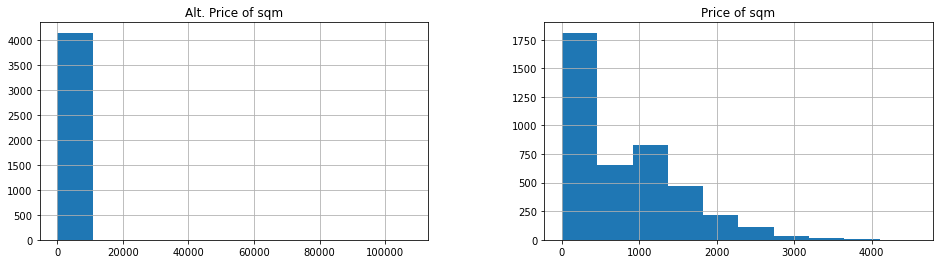

Pēc tīrīšanas


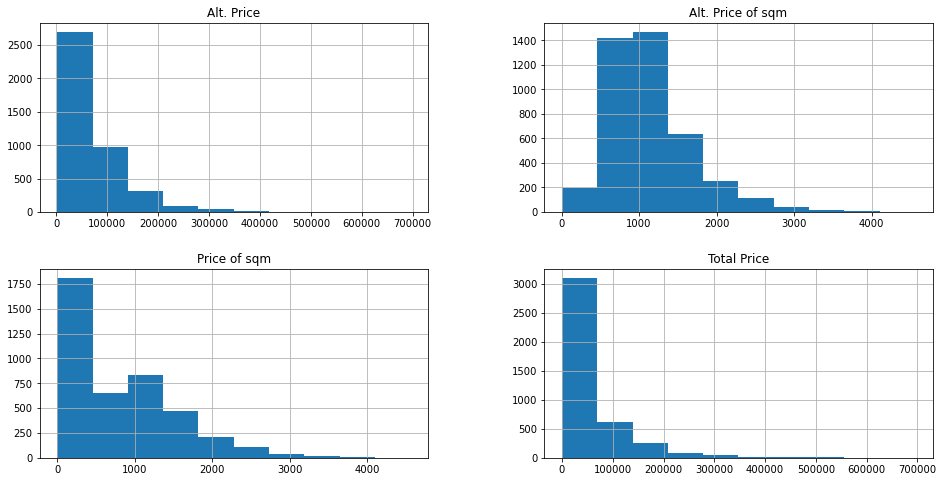

In [19]:
print('Pirms tīrīšanas')
ipasumi[['Price of sqm','Alt. Price of sqm']].hist(figsize=(16,4))
plt.show();

cleanDF = ipasumi.loc[ipasumi['Alt. Price of sqm'] <= ipasumi['Price of sqm'].max()]

print('Pēc tīrīšanas')
cleanDF[['Price of sqm','Alt. Price of sqm','Total Price','Alt. Price']].hist(figsize=(16,8))
plt.show();

### Īres dati

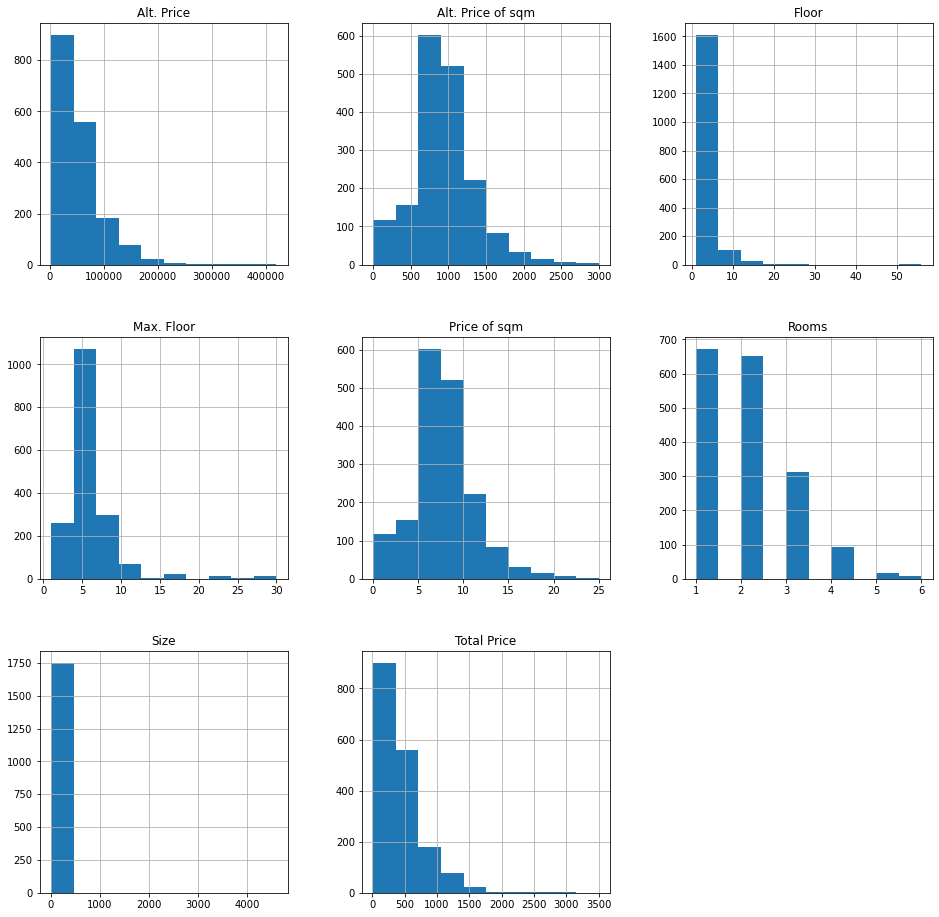

,Rooms,Size,Floor,Max. Floor,Price of sqm,Alt. Price of sqm,Total Price,Alt. Price
count,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00,1754.00
mean,1.95,58.99,3.58,6.00,7.86,943.17,471.21,56545.11
std,0.97,147.69,3.20,3.67,3.44,413.05,342.44,41093.24
min,1.00,2.00,1.00,1.00,0.04,4.92,15.00,1800.00
25%,1.00,32.00,2.00,4.00,6.00,720.00,250.00,30000.00
50%,2.00,47.00,3.00,5.00,7.58,909.60,350.00,42000.00
75%,2.00,65.00,4.00,6.00,9.68,1161.60,600.00,72000.00
max,6.00,4600.00,56.00,30.00,25.00,3000.00,3500.00,420000.00


In [20]:
cleanDF[cleanDF['Deal Type']=='RENT'].hist(figsize=(16,16))
plt.show();

cleanDF[cleanDF['Deal Type']=='RENT'].describe().round(2)

In [78]:
avg = cleanDF[cleanDF['Deal Type']=='RENT'].groupby(['District','Project'])[cleanDF.describe().columns].mean()
sDev = cleanDF[cleanDF['Deal Type']=='RENT'].groupby(['District','Project'])[cleanDF.describe().columns].std()
counts = cleanDF[cleanDF['Deal Type']=='RENT'].groupby(['District','Project'])[cleanDF.describe().columns].count()

counts[counts>3].dropna()
avg[counts>3].dropna().max()

Rooms                     3.000000
Size                    131.365385
Floor                    13.062500
Max. Floor               22.375000
Price of sqm           1106.753729
Alt. Price of sqm      1501.950000
Total Price            1134.857143
Alt. Price           136182.857143
dtype: float64

In [94]:
for c in cleanDF.describe().columns:
    for row in cleanDF.index:
        similarDF = cleanDF.loc[np.logical_and(cleanDF['District'] == cleanDF.loc[row,'District'],
                                               cleanDF['Project']== cleanDF.loc[row,'Project'])]
        similarDF = similarDF[similarDF['Deal Type'] == cleanDF.loc[row,'Deal Type']]
        
        avg = similarDF[c].mean()
        std = similarDF[c].std()        
        
        if similarDF[c].count() > 3 and c not in ['Rooms','Size','Floor','Max. Floor']:
            if abs(cleanDF.loc[row,c] - avg) > 10 * std:
                if cleanDF.loc[row,c] > maxim: print('Bigger than 99th percentile');
                if abs(cleanDF.loc[row,c] - avg) > 10 * std: print('Further than 10 standard deviations from mean');

                print(c)
                print(cleanDF.loc[row])
                if similarDF.loc[similarDF['Street Name'] == cleanDF.loc[row,'Street Name'], c].count() > 3:
                    cleanDF.loc[row,c] = similarDF.loc[similarDF['Street Name'] == cleanDF.loc[row,'Street Name'], c].mean()
                else:
                    cleanDF.loc[row,c] = avg
        else:
            if c == 'Rooms' and cleanDF.loc[row,c] > 10: cleanDF = cleanDF.drop(row, axis=0);
            if c == 'Floor' and cleanDF.loc[row,c] > 100: cleanDF = cleanDF.drop(row, axis=0);
            if c == 'Max. Floor' and cleanDF.loc[row,c] > 100: cleanDF = cleanDF.drop(row, axis=0);
            if c == 'Price of sqm' and cleanDF.loc[row,c] > abs(cleanDF.loc[row,c] - avg) > 2 * std: 
                cleanDF = cleanDF.drop(row, axis=0);
            if c == 'Alt. Price of sqm' and cleanDF.loc[row,c] > 100: 
                cleanDF = cleanDF.drop(row, axis=0);
            if c == 'Total Price' and cleanDF.loc[row,c] > 100: 
                cleanDF = cleanDF.drop(row, axis=0);
            if c == 'Alt. Price' and cleanDF.loc[row,c] > 100: 
                cleanDF = cleanDF.drop(row, axis=0);
            
cleanDF[cleanDF['Deal Type']=='RENT'].describe()

,Rooms,Size,Floor,Max. Floor,Price of sqm,Alt. Price of sqm,Total Price,Alt. Price
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,1.824887,48.002378,3.266425,6.071332,11.310298,944.783367,422.456413,50892.211043
std,0.724813,18.488128,2.196089,3.268425,62.844239,231.504339,214.376197,25984.809505
min,1.000000,10.000000,1.000000,1.000000,0.600000,405.600000,130.000000,15600.000000
25%,1.000000,35.715976,2.000000,5.000000,6.430000,781.604555,258.951813,31200.000000
50%,2.000000,46.000000,3.000000,5.000000,7.380000,902.054644,350.000000,42000.000000
75%,2.000000,58.030369,4.000000,6.000000,9.090000,1097.000000,535.333252,64830.541992
max,3.450000,209.000000,28.000000,30.000000,1117.148571,1875.600000,1500.000000,180000.000000


In [ ]:
rents = cleanDF[cleanDF['Deal Type']=='RENT']

for p in rents['Project'].drop_duplicates():
    print(p, '\n n =', rents.loc[rents['Project'] == p, 'Size'].count())
    #rents[rents['Project'] == p].hist(figsize=(14,8))
    #plt.show();
    print(rents[rents['Project'] == p].describe(),'\n\n')

### Pārdošanas darījumi

In [ ]:
cleanDF[cleanDF['Deal Type']=='SELL'].hist(figsize=(16,14))
plt.show();

cleanDF[cleanDF['Deal Type']=='SELL'].describe().round(2)

In [79]:
avg = cleanDF[cleanDF['Deal Type']=='SELL'].groupby(['District','Project'])[cleanDF.describe().columns].mean()
sDev = cleanDF[cleanDF['Deal Type']=='SELL'].groupby(['District','Project'])[cleanDF.describe().columns].std()
counts = cleanDF[cleanDF['Deal Type']=='SELL'].groupby(['District','Project'])[cleanDF.describe().columns].count()

counts[counts>3].dropna()
avg[counts>3].dropna().max()

Rooms                     3.400000
Size                     99.900000
Floor                    10.340909
Max. Floor               15.983333
Price of sqm           3613.210000
Alt. Price of sqm      3613.210000
Total Price          344499.900000
Alt. Price           344499.900000
dtype: float64

RENT


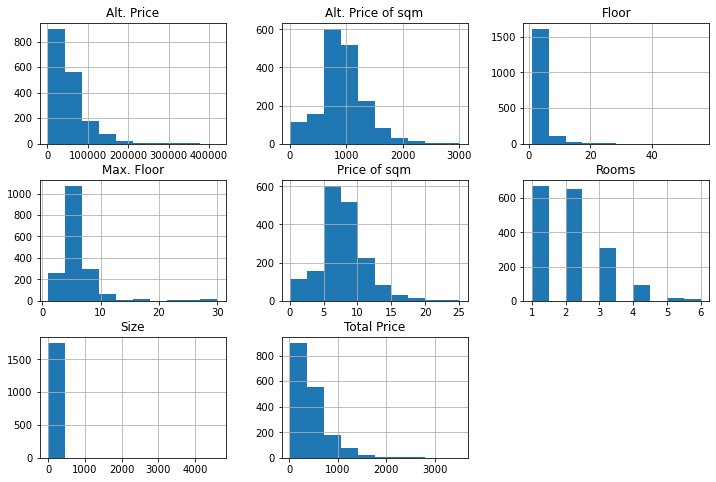

SELL


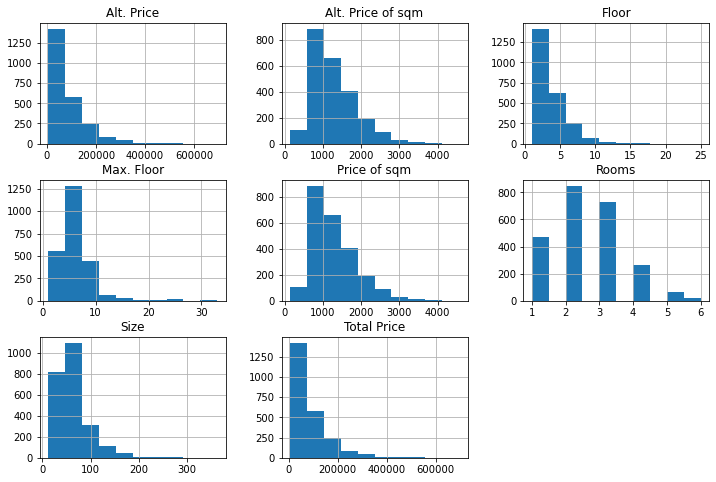

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4156 entries, 0 to 4968
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Deal Type          4156 non-null   object        
 1   Comment            4156 non-null   object        
 2   Link               4156 non-null   object        
 3   District           4156 non-null   object        
 4   Street Name        4156 non-null   object        
 5   Street No.         4156 non-null   object        
 6   Rooms              4156 non-null   int64         
 7   Size               4156 non-null   int64         
 8   Floor              4156 non-null   int64         
 9   Max. Floor         4156 non-null   int64         
 10  Project            4156 non-null   object        
 11  Post Date          4156 non-null   datetime64[ns]
 12  Price of sqm       4156 non-null   float64       
 13  Alt. Price of sqm  4156 non-null   float64       
 14  Total Pr

In [22]:
for deal in cleanDF['Deal Type'].drop_duplicates():
    print(deal)
    cleanDF[cleanDF['Deal Type'] == deal].hist(figsize=(12,8))
    plt.show();
    
cleanDF.info()

## Datu analīze

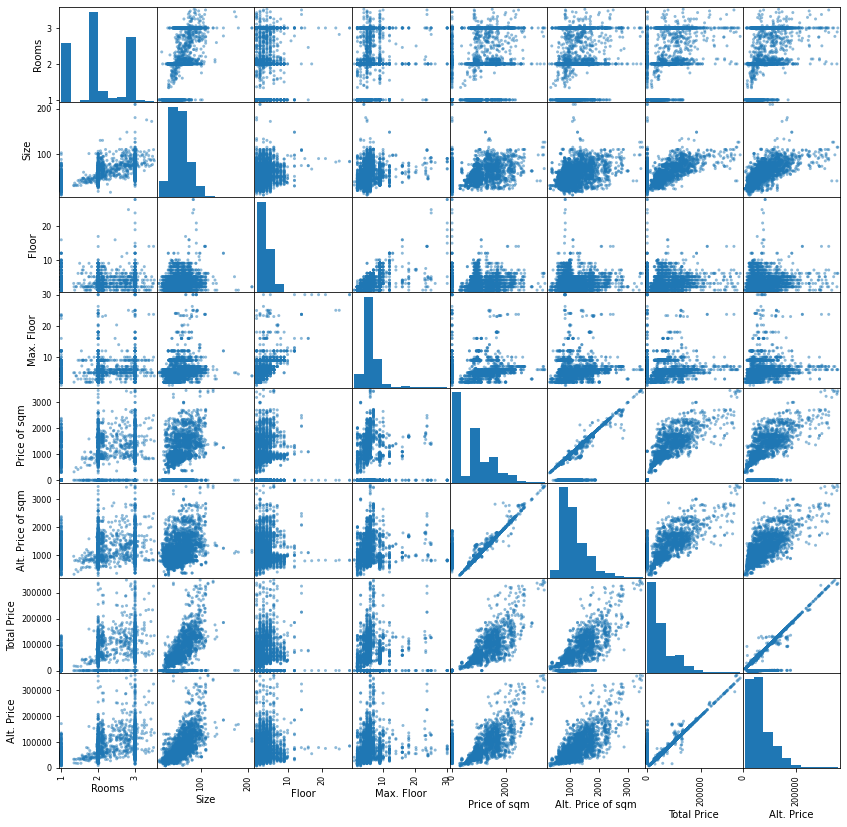

In [109]:
pd.plotting.scatter_matrix(cleanDF, figsize=(14,14))
plt.show();

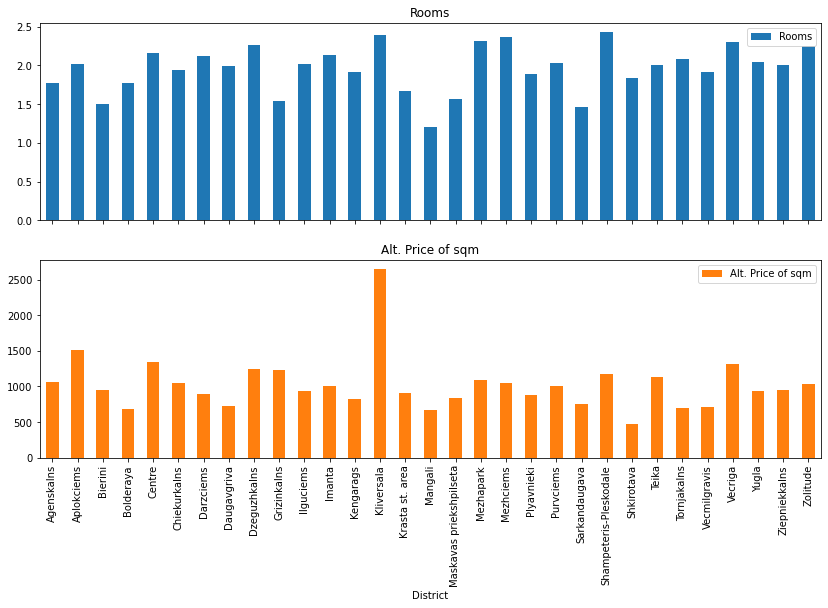

In [110]:
cleanDF.groupby('District')[['Rooms','Alt. Price of sqm']].mean().plot(kind='bar', subplots=True, figsize=(14,8))
plt.show()

Chrusch.


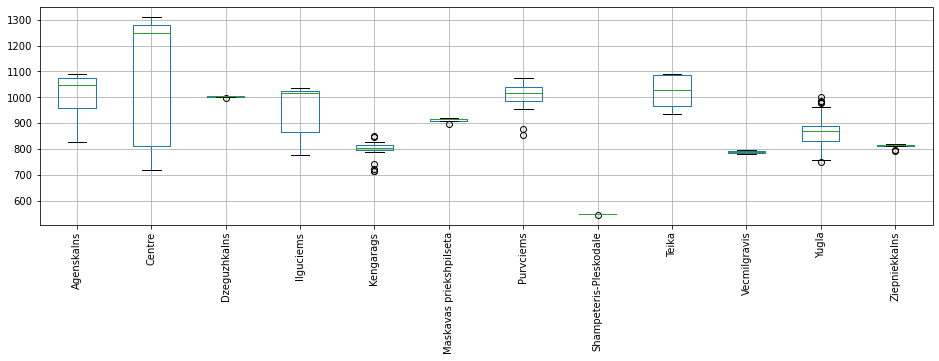

Spec. pr.


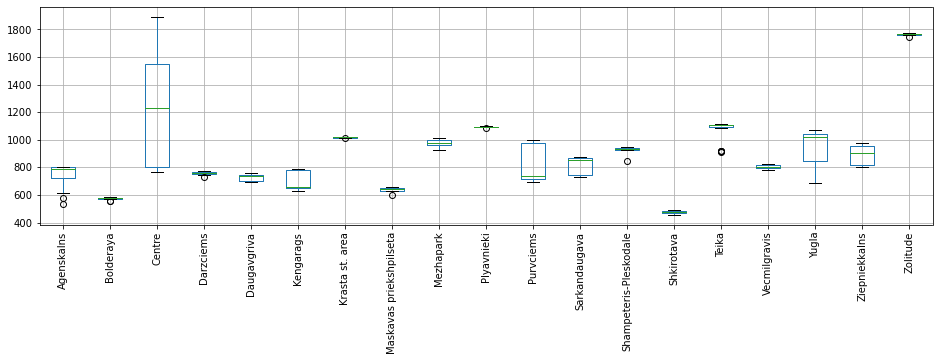

New


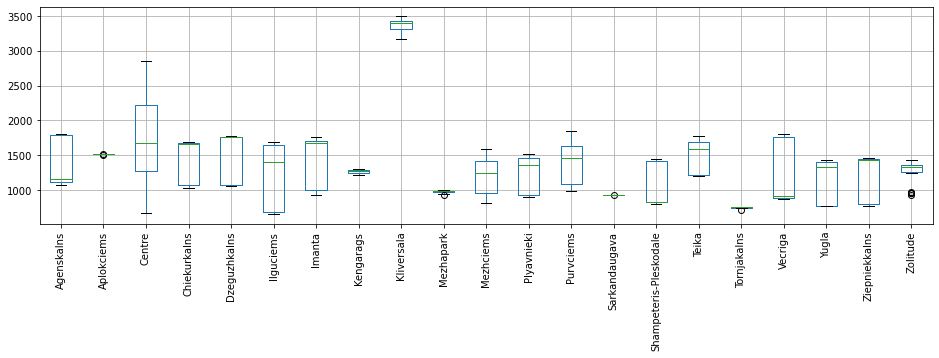

Perewar


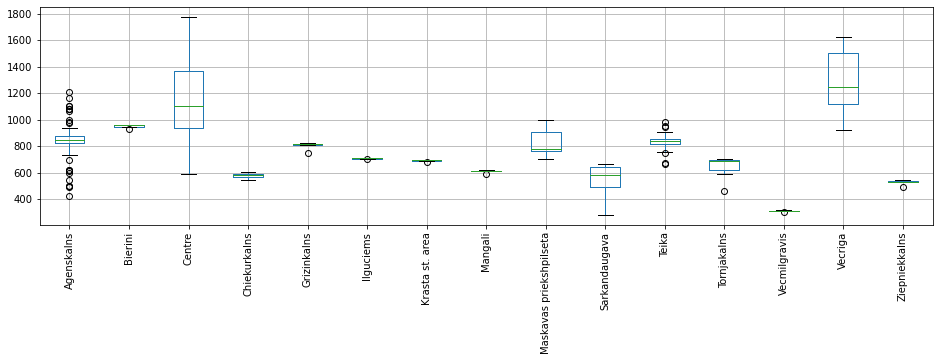

Stalin pr.


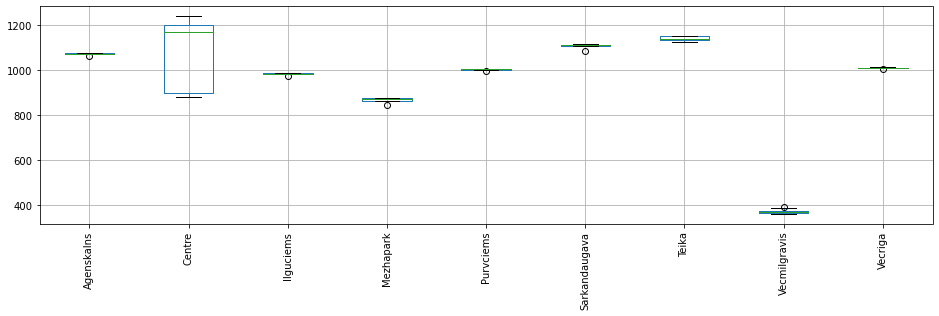

Lit pr.


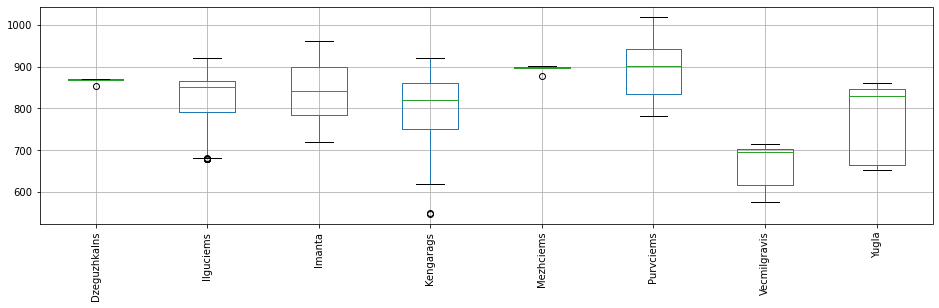

Private


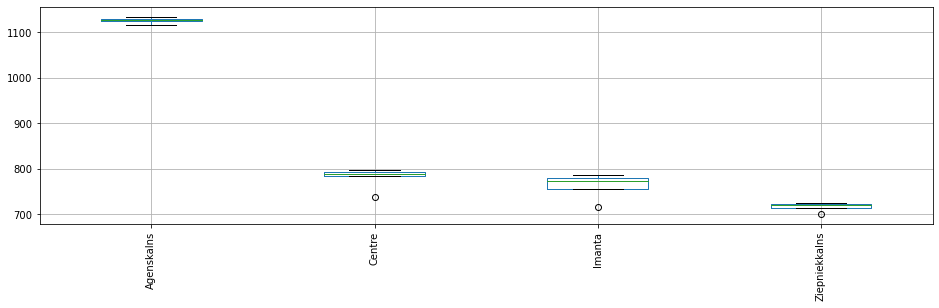

Czech pr.


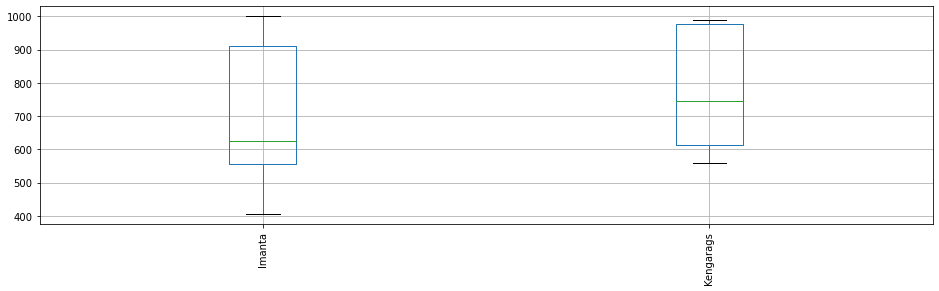

602-th


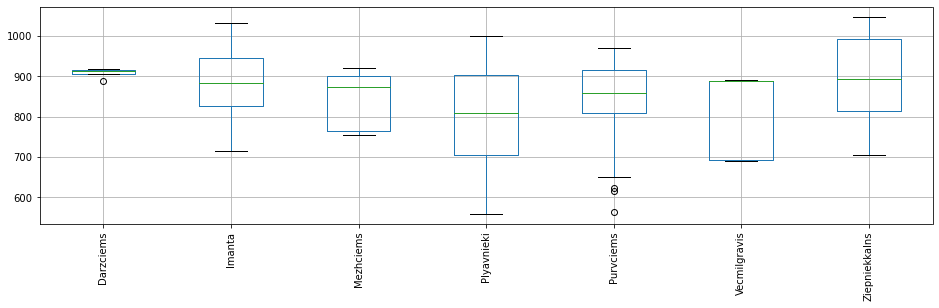

467-th


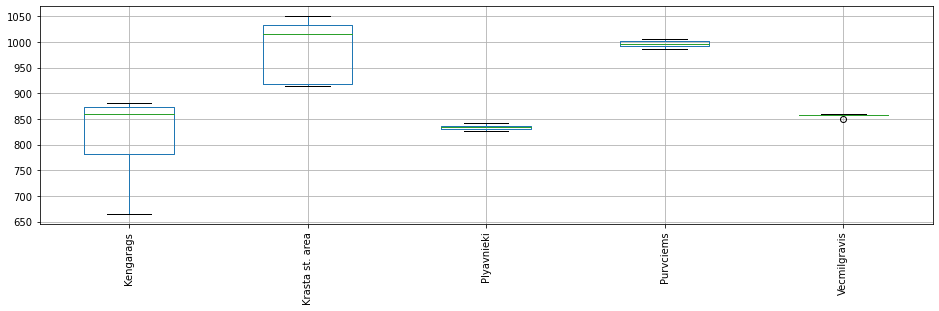

103-th


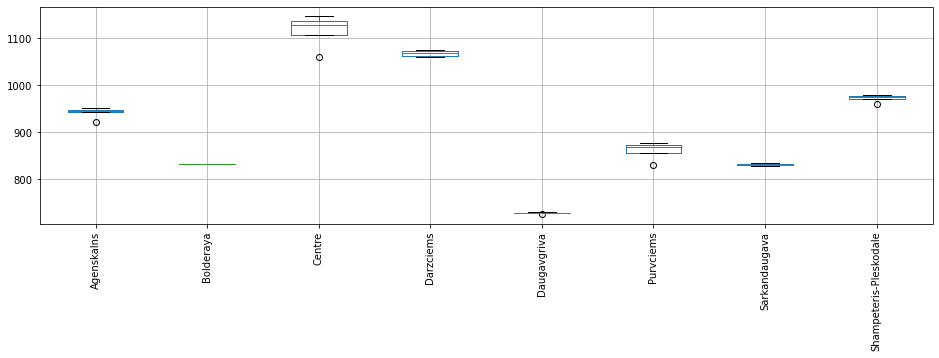

Recon.


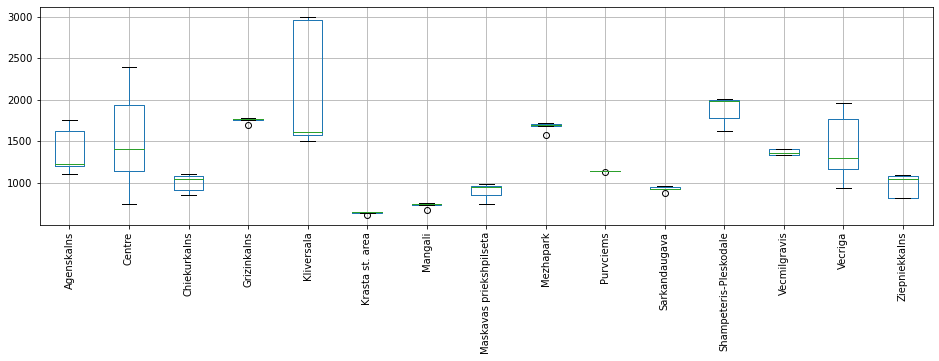

Small


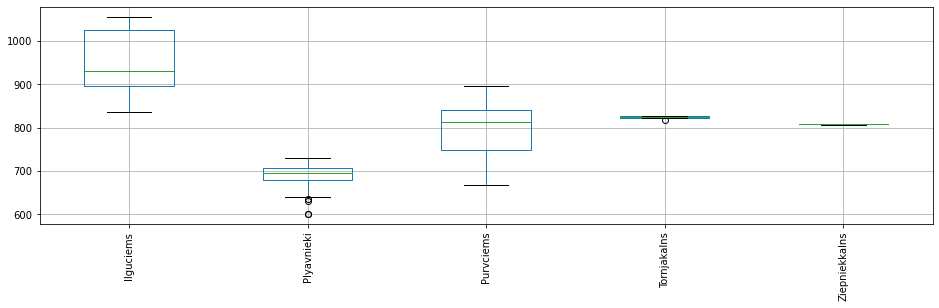

104-th


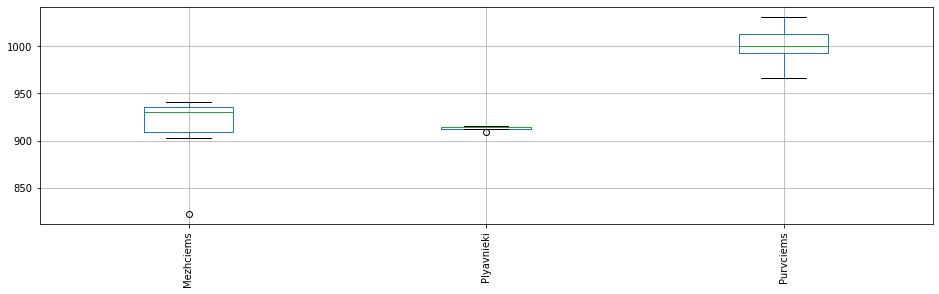

119-th


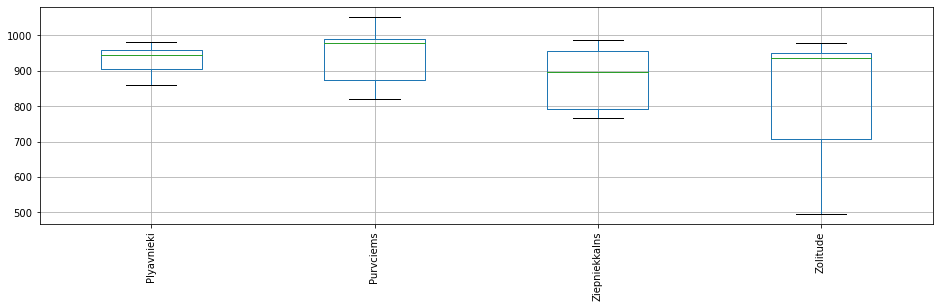

In [154]:
for proj in cleanDF['Project'].drop_duplicates():
    print(proj)    
    cleanDF.loc[cleanDF['Project']==proj].pivot(index='Link', columns='District', 
                                                values='Alt. Price of sqm').boxplot(figsize=(16,4), rot=90)
    plt.show();


In [217]:
cleanDF['AVG_Price_SQM'] = 0.0
cleanDF['FloorZ'] = (cleanDF['Max. Floor']/2).round(0) - cleanDF['Floor']

attrNames = ['District','Project','Max. Floor','Street Name']
for r in cleanDF.index:
    perfMatch = cleanDF.copy()
    for i in range(4):
        perfMatch = perfMatch[perfMatch[attrNames[i]] == cleanDF.loc[r, attrNames[i]]]
        
        if perfMatch['Size'].count() <= 10: break;
    
    cleanDF.loc[r, 'AVG_Price_SQM'] = perfMatch.drop(r, axis=0)['Alt. Price of sqm'].mean()
    

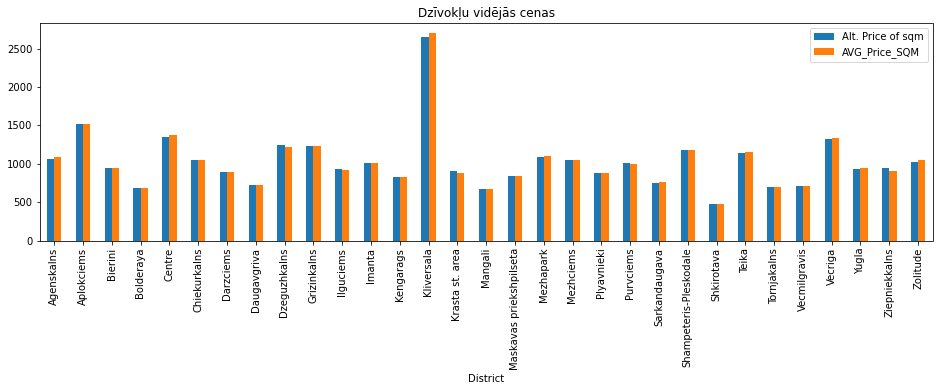

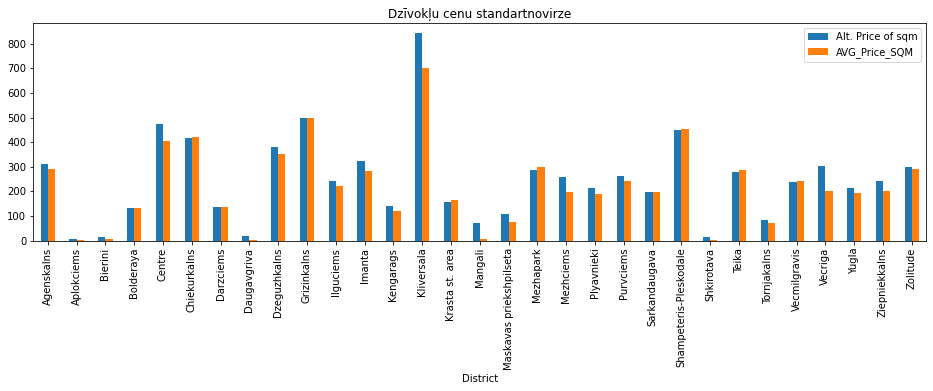

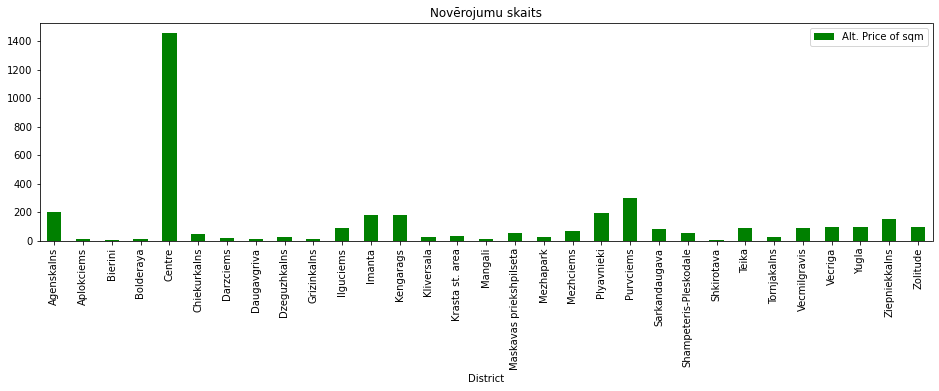

In [175]:
cleanDF.groupby('District')[['Alt. Price of sqm','AVG_Price_SQM']].mean().plot(kind='bar', figsize=(16,4),
                                                                              title='Dzīvokļu vidējās cenas')
plt.show();

cleanDF.groupby('District')[['Alt. Price of sqm','AVG_Price_SQM']].std().plot(kind='bar', figsize=(16,4),
                                                                             title='Dzīvokļu cenu standartnovirze')
plt.show();

cleanDF.groupby('District')[['Alt. Price of sqm']].count().plot(kind='bar', figsize=(16,4), color='green',
                                                                             title='Novērojumu skaits')
plt.show();

Agenskalns


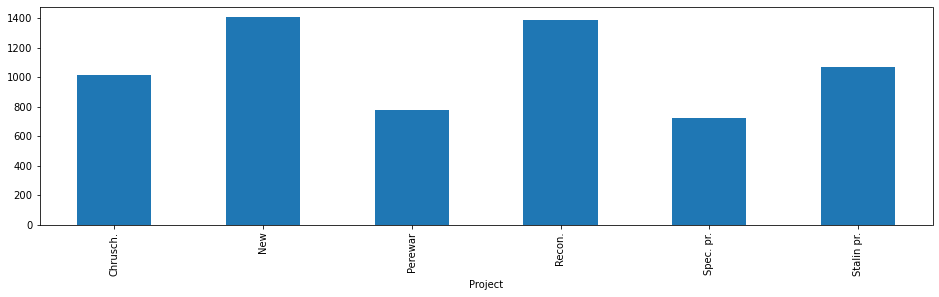

Centre


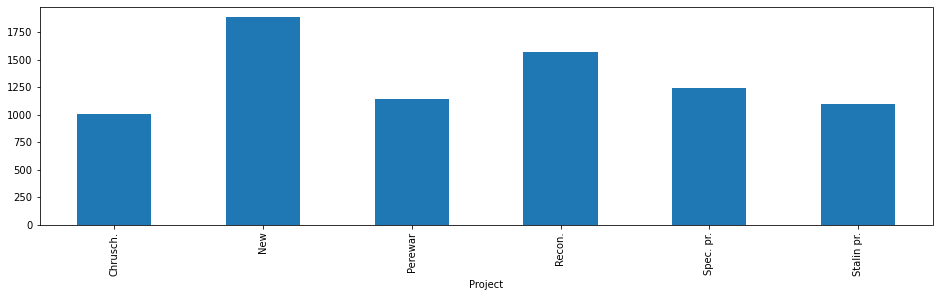

Chiekurkalns


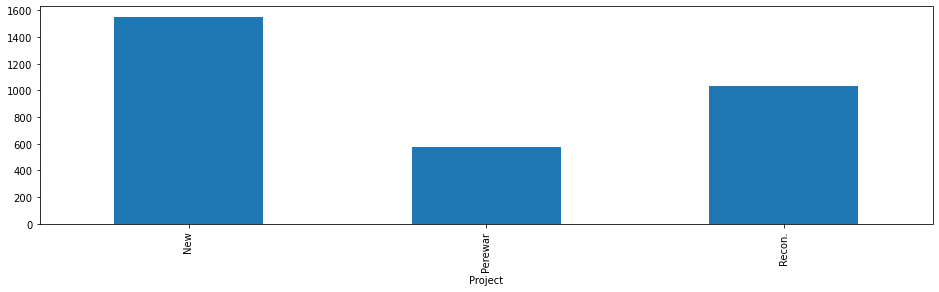

Dzeguzhkalns


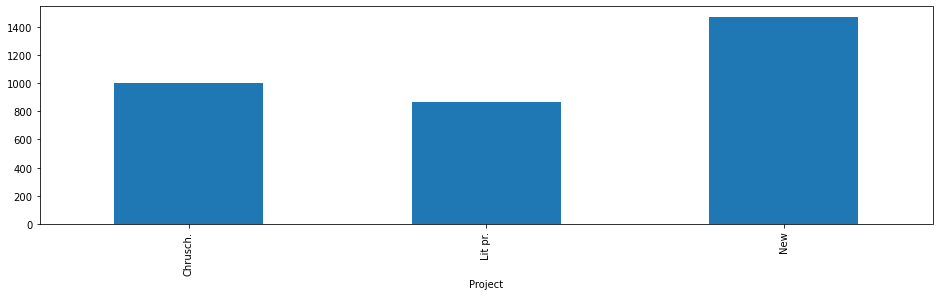

Ilguciems


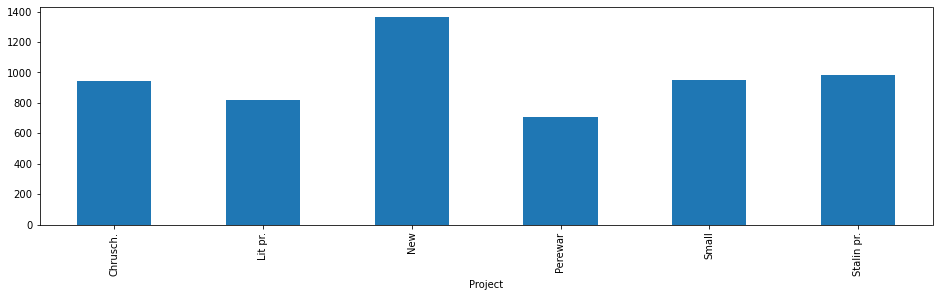

Imanta


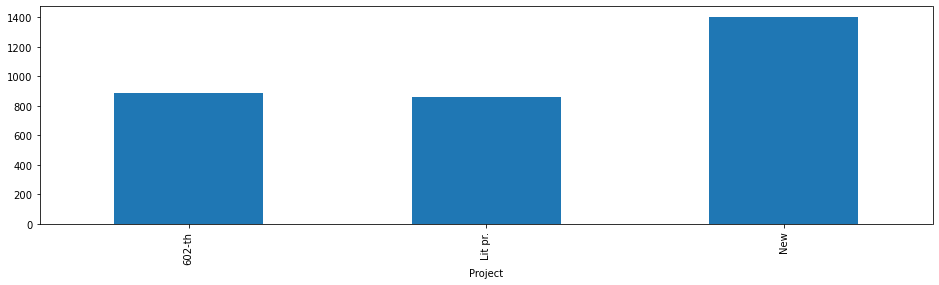

Kengarags


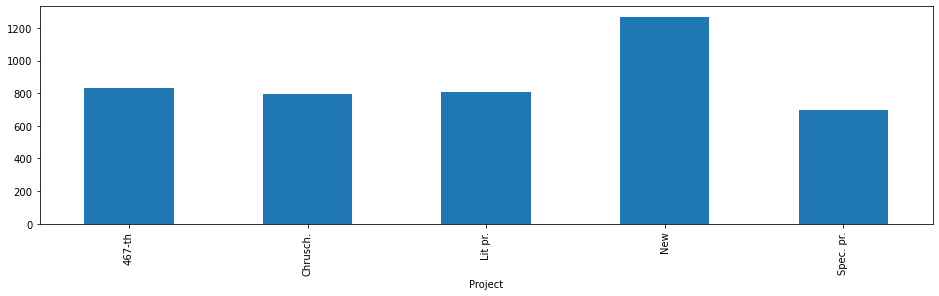

Kliversala


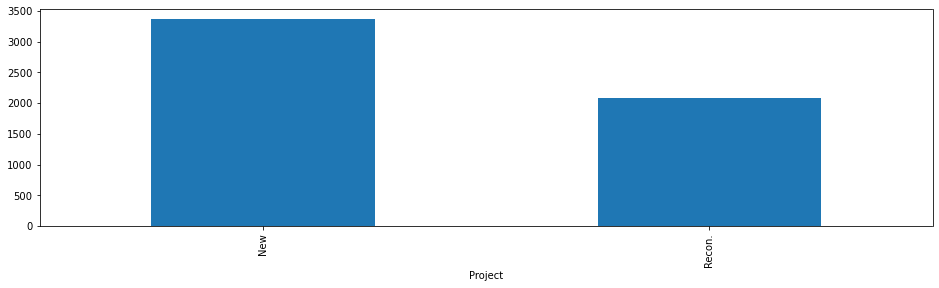

Krasta st. area


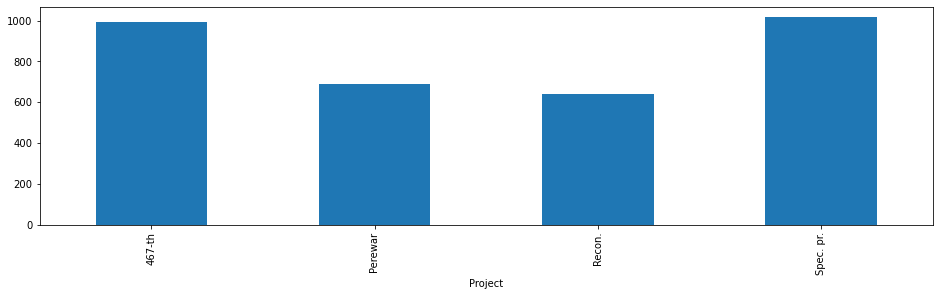

Maskavas priekshpilseta


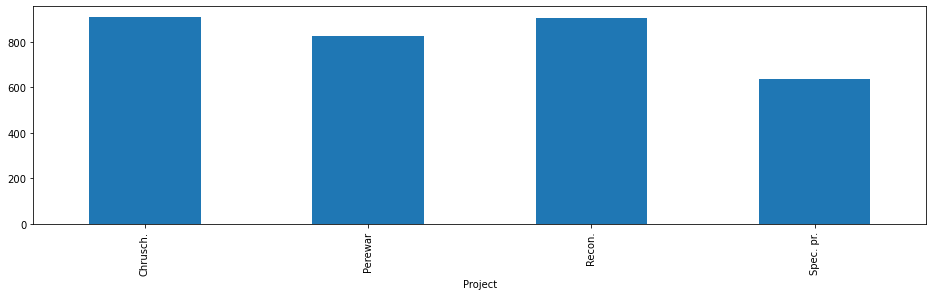

Mezhapark


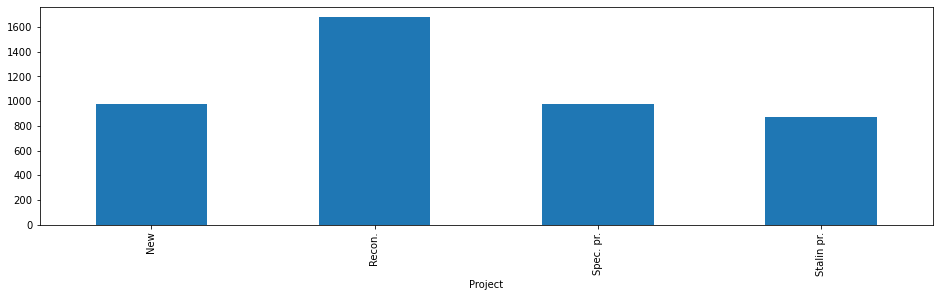

Mezhciems


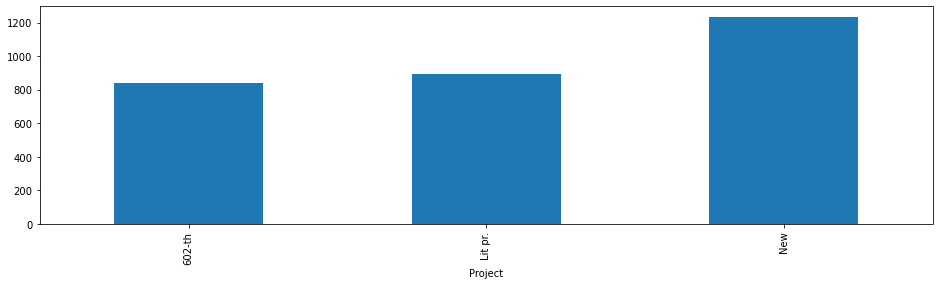

Plyavnieki


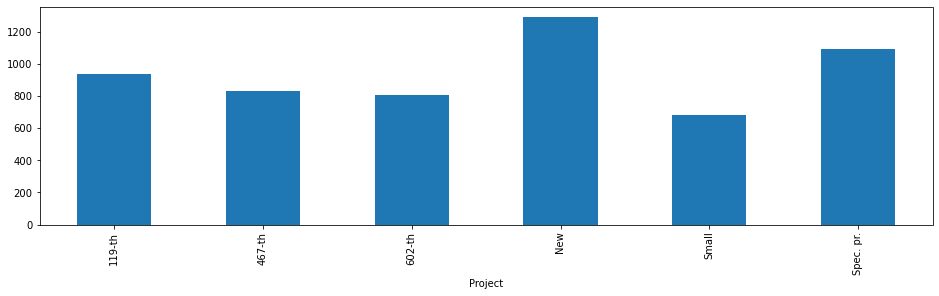

Purvciems


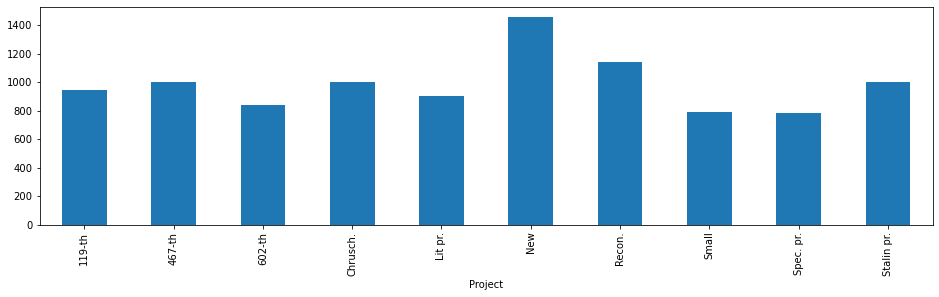

Sarkandaugava


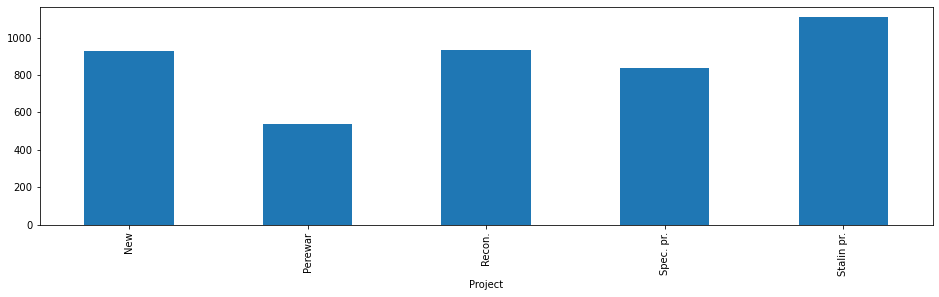

Shampeteris-Pleskodale


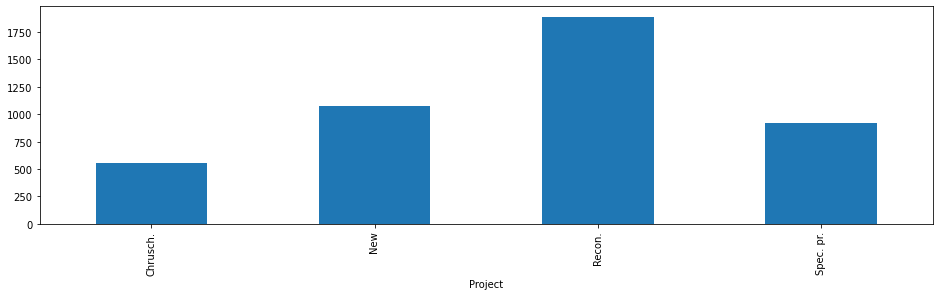

Teika


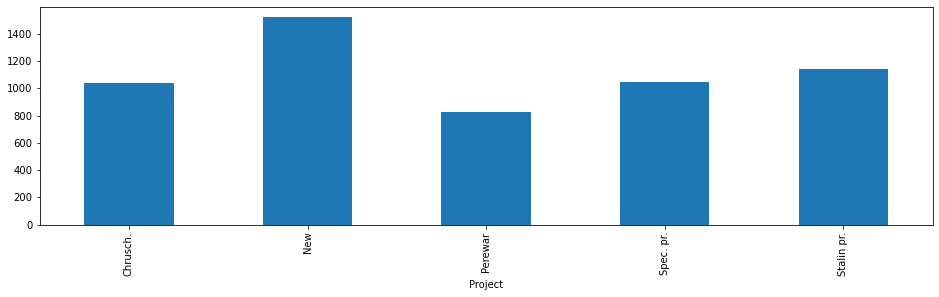

Tornjakalns


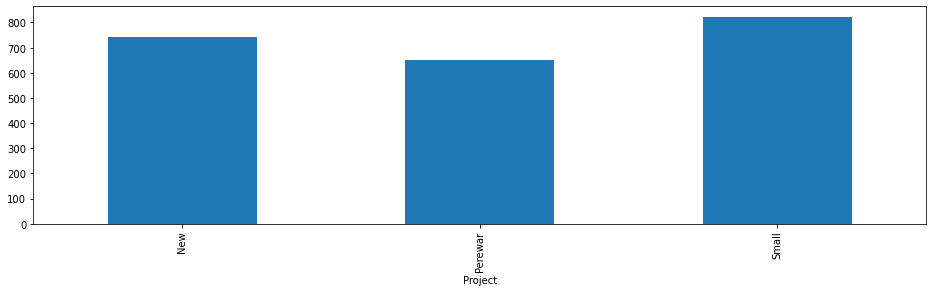

Vecmilgravis


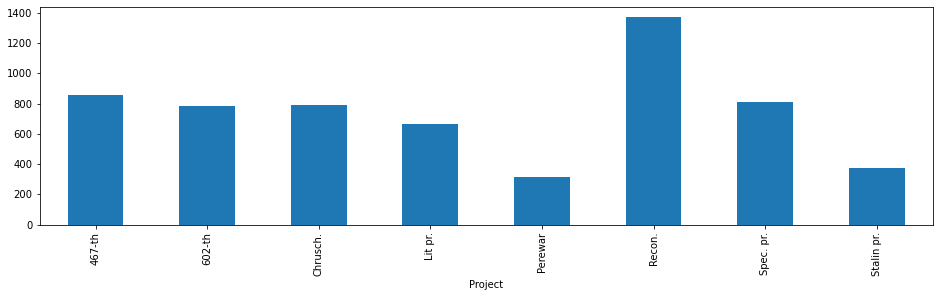

Vecriga


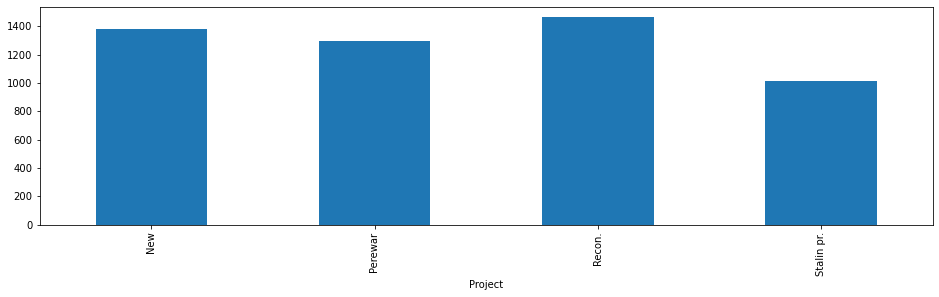

Yugla


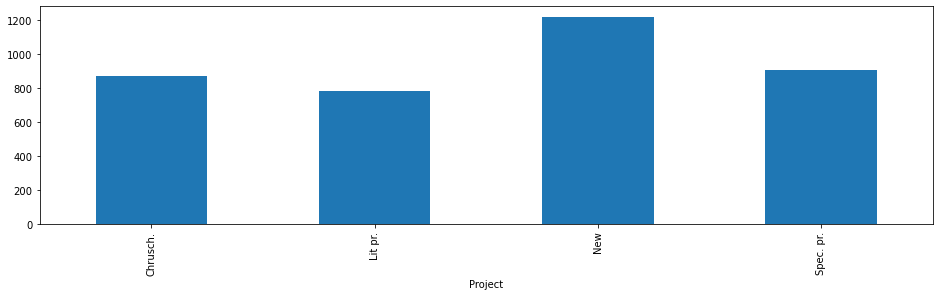

Ziepniekkalns


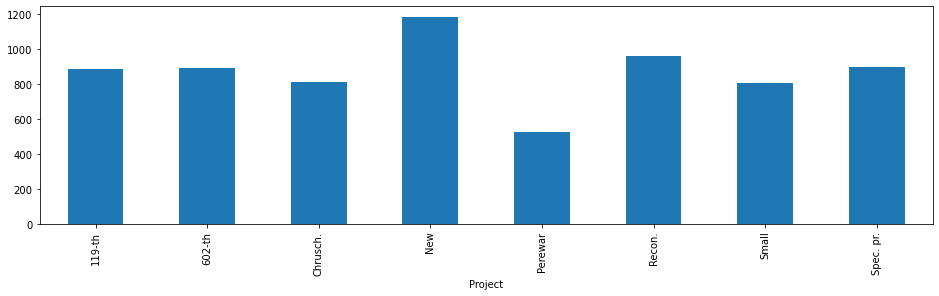

Zolitude


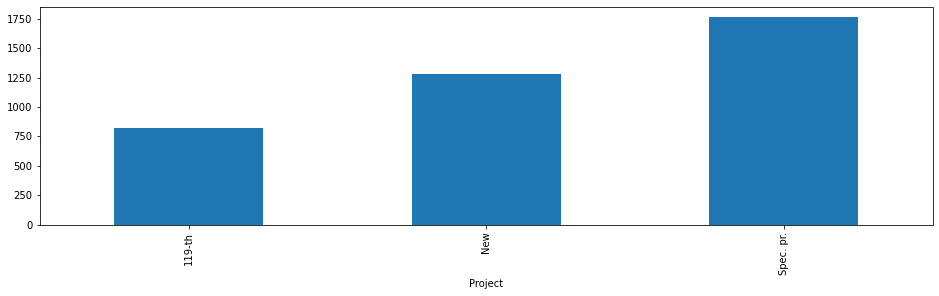

In [221]:
cleanDF[['District', 'Project', 'AVG_Price_SQM']].dropna().sort_values(by=['District','Project'])
distN = cleanDF.groupby(['District'])['Size'].count().dropna()
projN = cleanDF.groupby(['Project'])['Size'].count().dropna()

presentDF = cleanDF.copy()
for i in cleanDF['District'].drop_duplicates():
    if i not in distN[distN>distN.quantile(0.25)].index:
        presentDF = presentDF[presentDF['District'] != i]
    
for i in cleanDF['Project'].drop_duplicates():
    if i not in projN[projN>projN.quantile(0.25)].index:
        presentDF = presentDF[presentDF['Project'] != i]
    
for distr in presentDF['District'].drop_duplicates().sort_values():
    print(distr)
    presentDF.loc[presentDF['District'] == distr].groupby('Project')['AVG_Price_SQM'].mean().plot(kind='bar', 
                                                                                                  figsize=(16,4))
    plt.show();

In [241]:
presentDF[presentDF['Project']=='New'].groupby('District')['AVG_Price_SQM'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
District,,,,,,,,
Agenskalns,26.0,1406.22,214.68,1130.84,1241.08,1310.51,1529.88,1800.42
Centre,140.0,1883.99,470.46,681.68,1658.56,1935.56,2256.92,2712.69
Chiekurkalns,11.0,1553.48,241.06,1062.89,1650.47,1660.12,1662.79,1674.67
Dzeguzhkalns,12.0,1475.55,287.37,1068.92,1329.89,1421.68,1760.96,1764.36
Ilguciems,7.0,1361.69,470.14,670.59,1150.65,1625.78,1640.19,1653.80
Imanta,43.0,1403.29,262.04,980.46,1184.66,1433.15,1642.24,1748.84
Kengarags,9.0,1269.23,8.58,1259.16,1264.46,1265.80,1272.48,1288.00
Kliversala,10.0,3367.77,11.89,3353.75,3360.62,3363.67,3373.69,3389.63
Mezhapark,8.0,974.32,3.37,971.16,972.20,973.17,975.06,980.48
